In this notebook the EmoReact dataset is explored and preprocessed such that only the faces are kept for later processing. 

In [92]:
from os import listdir
import skvideo.io
%matplotlib inline

import matplotlib
import numpy as np
import cv2
import matplotlib.pyplot as plt

Creating a file listing, counting all the videos.

In [93]:
videopath = "/mnt/disk1/documents/data/EmoReact_V_1.0/Data/Train"
files = listdir(videopath)
print(len(files))

434


scikit-video is used for reading the videos as sequences of frames

In [94]:
videodata = skvideo.io.vread(videopath + "/" + files[1])
print(videodata.shape)

(150, 720, 1280, 3)


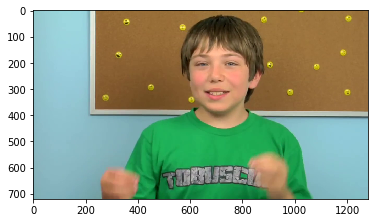

In [95]:
plt.imshow(videodata[10])

In [96]:
videos = []
for file in files[:10]:
    videos.append(skvideo.io.vread(videopath + "/" + file))
print(len(videos))

10


Load facecascade for identifying face.

In [97]:
faceCascade=cv2.CascadeClassifier('/home/pieter/projects/engagement-l2tor/data/haarcascade_frontalface_alt.xml')
faceCascade.empty()

False

In [98]:
#lookup how many frames cannot be used for face detection
#we will get rid of these and crop the video to only contain the face
print(len(videos[1]))
noface = 0
video_face = []
for frame in videos[1]:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.3, 5)
    # Draw a rectangle around the faces
    if len(faces) != 0:
        for (x, y, w, h) in faces:
            #cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            video_face.append(frame[y:y+h, x:x+w])
    else:
        noface+= 1
print(noface)

150
17


133


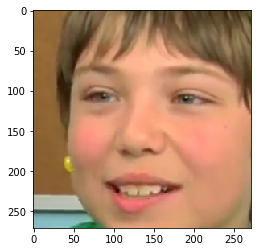

In [102]:
print(len(video_face))
for x in video_face:
    plt.imshow(x)